Observatory Charts
==========

Documentation and testing for the Academic Observatory charts library

In [1]:
%load_ext autoreload
%autoreload 2
from academic_observatory.analysis.charts import *
from maps import *
import pandas as pd
import unittest

sns.set_context('paper')

In [2]:
test_data = pd.read_csv('tests/example_data.csv')
# Data cleanup required, mainly on country names #

In [3]:
country_clean = { "country" : {
    "United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
    "Iran (Islamic Republic of)" : "Iran",
    "Korea, Republic of" : "South Korea",
    "Taiwan, Province of China" : "Taiwan"
                              }
                }
test_data.replace(to_replace = country_clean, inplace=True)
test_data.loc[test_data.country.isin(['Canada', 'United States of America']), 'region'] = 'North America'
test_data = test_data.replace('Americas', 'Latin America')

In [4]:
# chart = AbstractObservatoryChart(test_data)

/Users/266883j/Documents/academic-observatory/academic_observatory/analysis/charts.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  figdata['order'] = figdata['region'].map(sorterIndex)


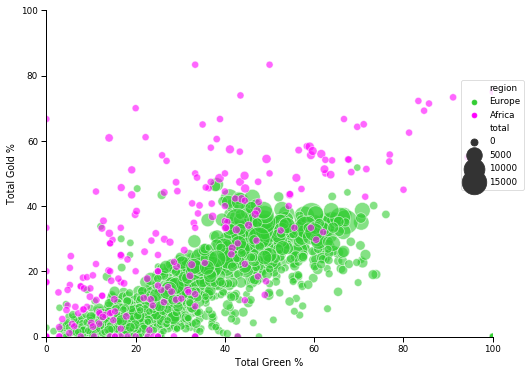

In [5]:
scatter = ScatterPlot(test_data, 'percent_green', 'percent_gold', 'region', ['Europe', 'Africa'])
scatter.process_data()
scatter.plot(xlim=(0,100), ylim=(0,100), figsize=(8,6), xlabel='Total Green %', ylabel = 'Total Gold %')

In [6]:
scatter.animate(year_range=(2010,2018), xlim=(0,100), ylim=(0,100))

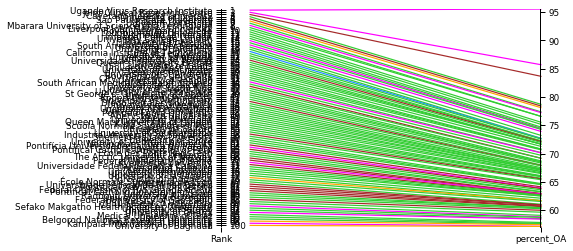

In [7]:
rank = RankChart(test_data, 'percent_OA','published_year', 2017)
rank.process_data()
rank.plot()

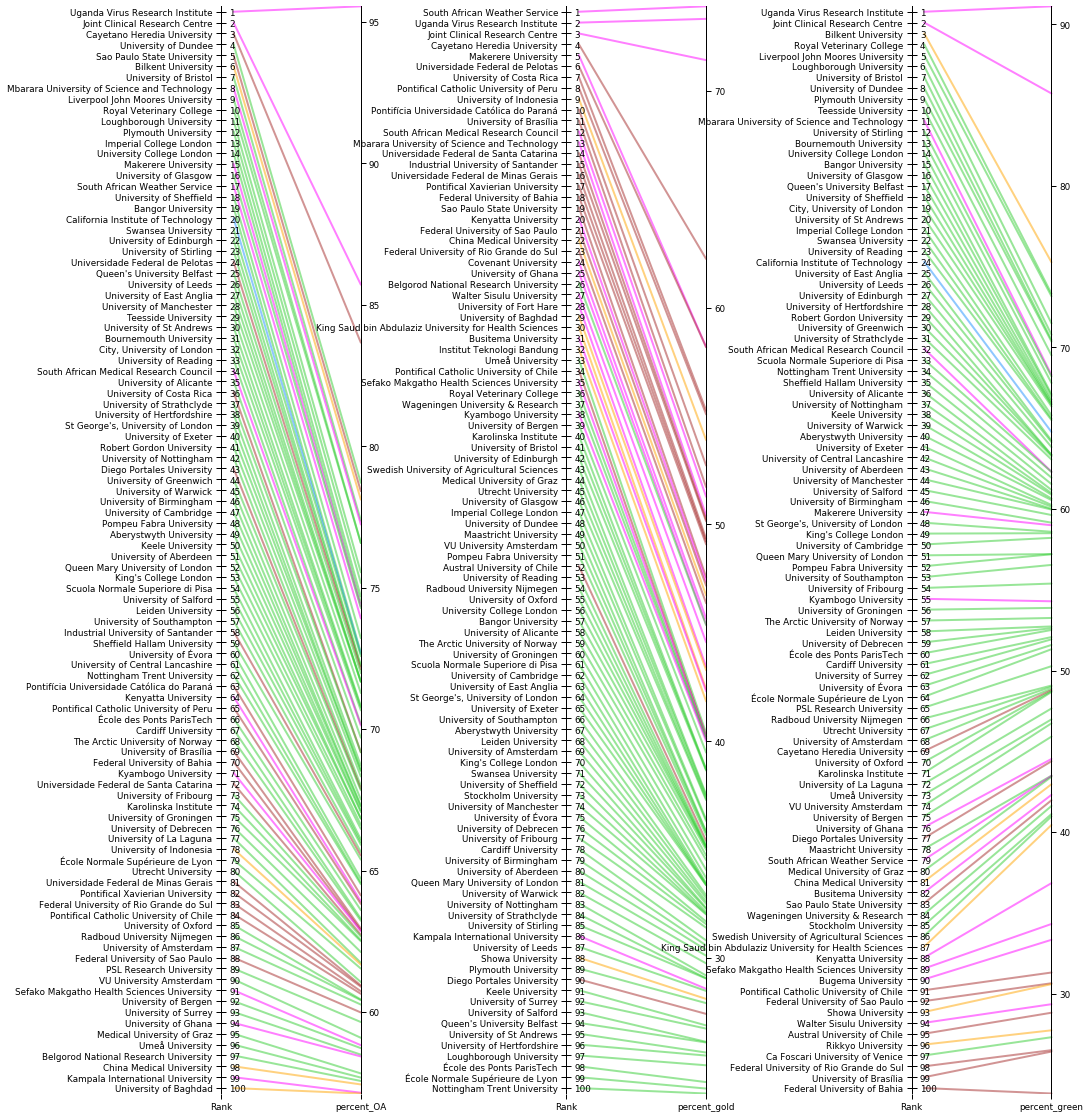

In [8]:
params = [
            {
            'chart_class': RankChart,
            'rankcol': 'percent_OA',
            'filter_name': 'published_year',
            'filter_value': 2017
            },
            {
            'chart_class': RankChart,
            'rankcol': 'percent_gold',
            'filter_name': 'published_year',
            'filter_value': 2017
            },
            {
            'chart_class': RankChart,
            'rankcol': 'percent_green',
            'filter_name': 'published_year',
            'filter_value': 2017
            }
]
ranking = Layout(test_data, params)
ranking.process_data()
r = ranking.plot(wspace=1.36, line_args={"linewidth": 2, "alpha": 0.5})

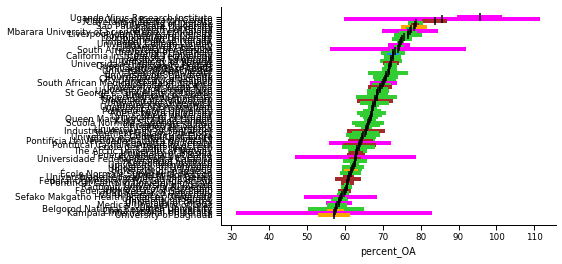

In [9]:
#calculate the % error margins for 95% confidence intervals for total OA, gold OA and green OA
test_data['percent_oa_err'] = 100*1.96*(test_data['percent_OA']/100*(1-test_data['percent_OA']/100)/test_data['total'])**(.5)
test_data['percent_gold_err'] = 100*1.96*(test_data['percent_gold']/100*(1-test_data['percent_gold']/100)/test_data['total'])**(.5)
test_data['percent_green_err'] = 100*1.96*(test_data['percent_green']/100*(1-test_data['percent_green']/100)/test_data['total'])**(.5)

c = ConfidenceIntervalRank(test_data, 'percent_OA', 'percent_oa_err', 'published_year', 2017)
c.process_data()
c.plot()

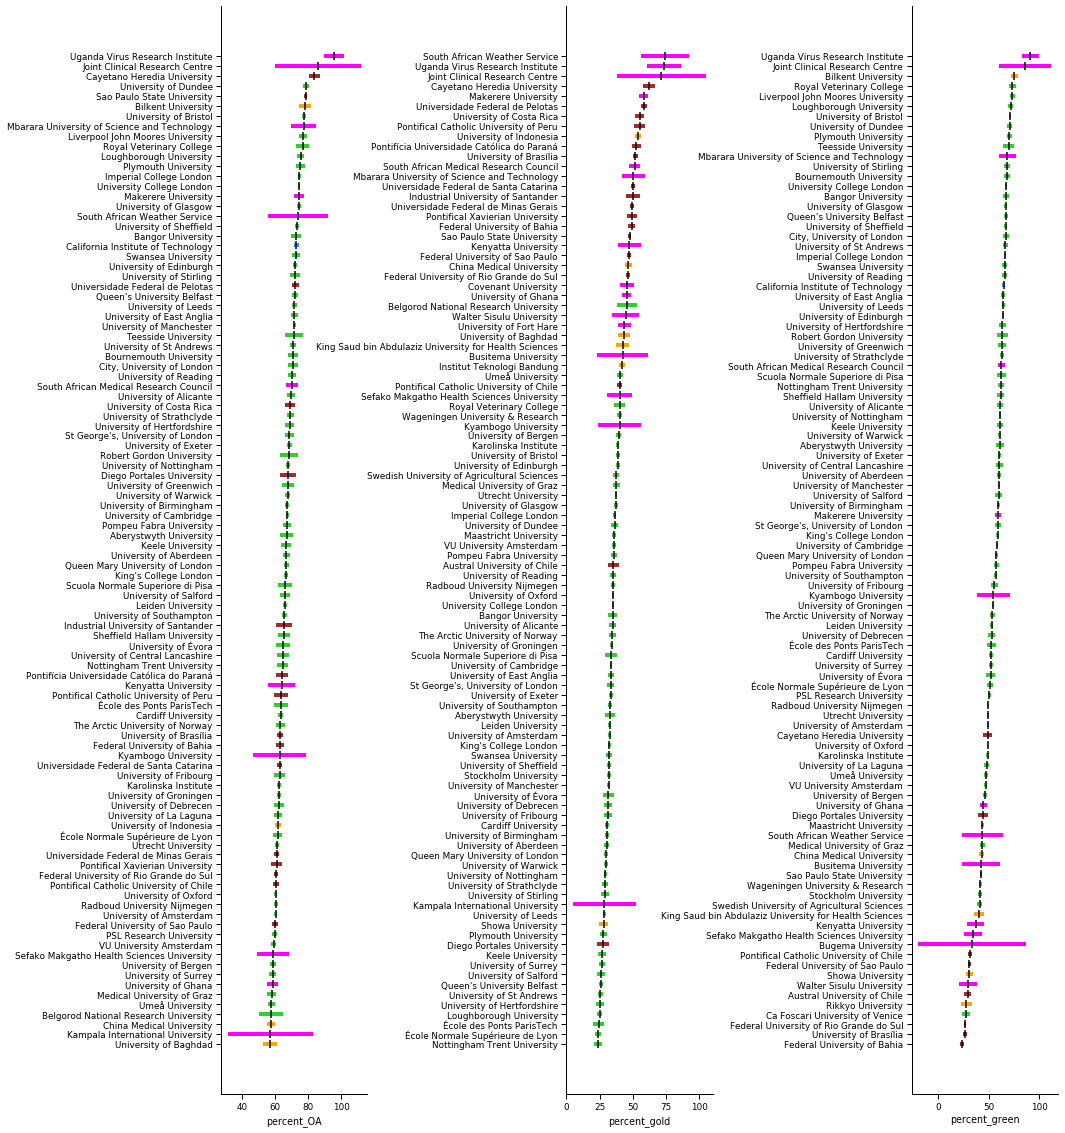

In [10]:
params = [
            {
            'chart_class': ConfidenceIntervalRank,
            'rankcol': 'percent_OA',
            'errorcol': 'percent_oa_err',
            'filter_name': 'published_year',
            'filter_value': 2017
            },
            {
            'chart_class': ConfidenceIntervalRank,
            'rankcol': 'percent_gold',
            'errorcol': 'percent_gold_err',
            'filter_name': 'published_year',
            'filter_value': 2017
            },
            {
            'chart_class': ConfidenceIntervalRank,
            'rankcol': 'percent_green',
            'errorcol': 'percent_green_err',
            'filter_name': 'published_year',
            'filter_value': 2017
            }
]
ci = Layout(test_data, params)
ci.process_data()
ci = ci.plot(wspace=1.36)

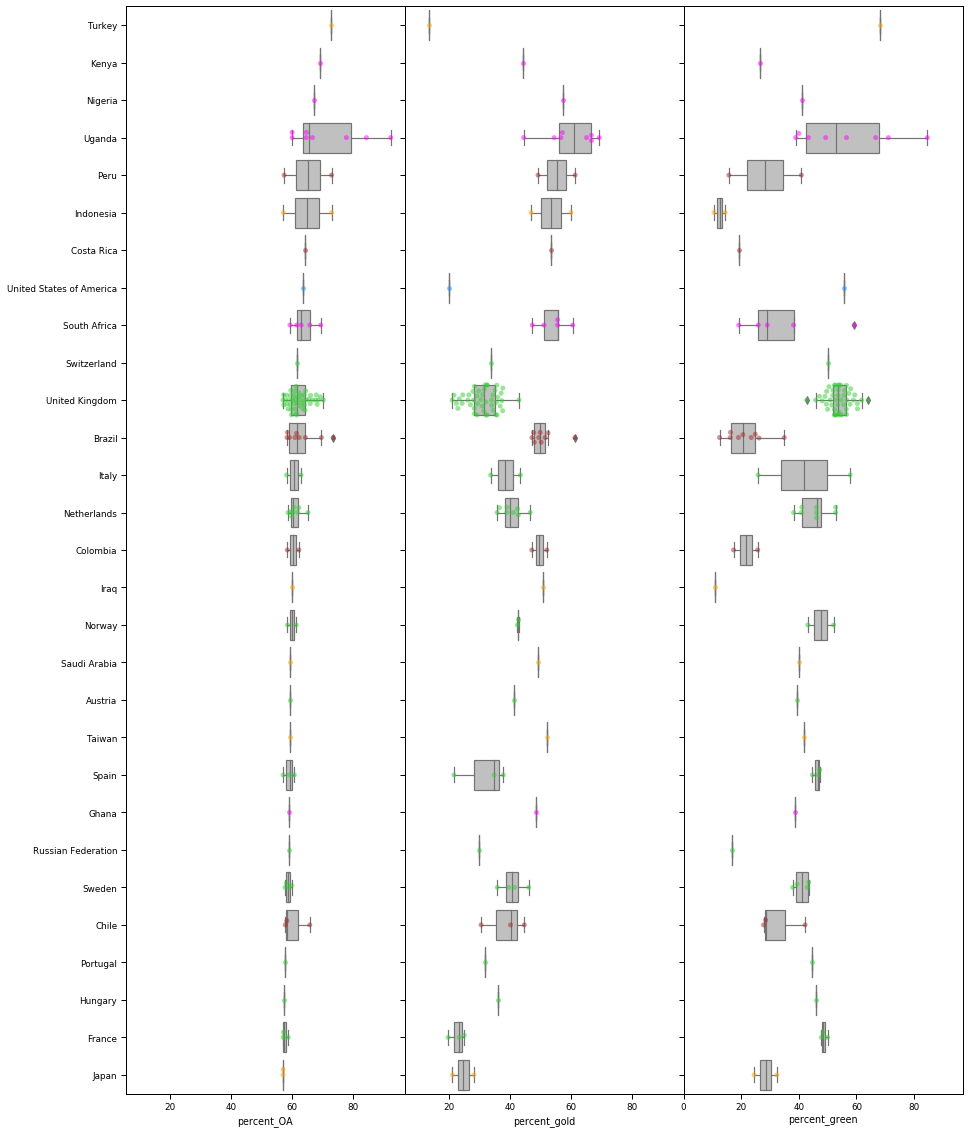

In [11]:
b = BoxScatter(test_data, 2018, 'country', ['percent_OA', 'percent_gold','percent_green'])
b.process_data()
b.plot()

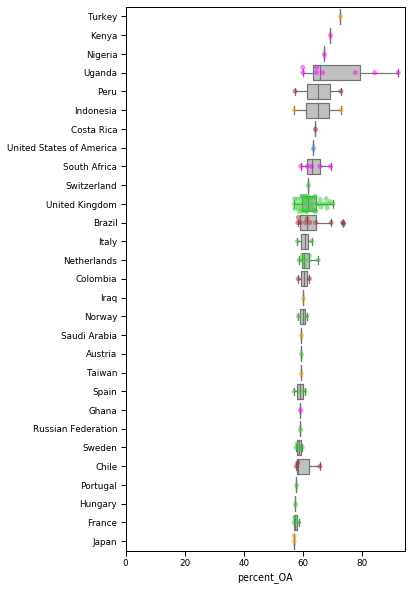

In [12]:
b = BoxScatter(test_data, 2018, 'country', 'percent_OA')
b.process_data()
p = b.plot(figsize=(5,10))

In [13]:
t = TimePlot(test_data, (2007,2016), 
             ['grid.83440.3b', # University College London 
              'grid.4991.5', # University of Oxford 
              'grid.8756.c', # University of Glasgow
              'grid.6571.5', # Loughborough University
              'grid.11914.3c', # University of St Andrews
              'grid.11201.33', #Plymouth University
              ], 
             'percent_green')

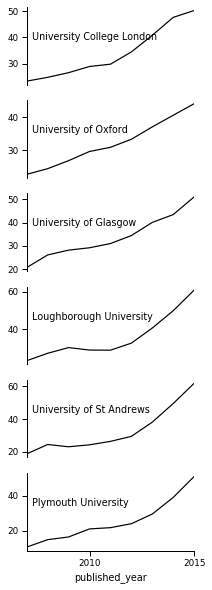

In [14]:
t.process_data()
t.plot(xticks=[2010,2015], figsize=(3,10))

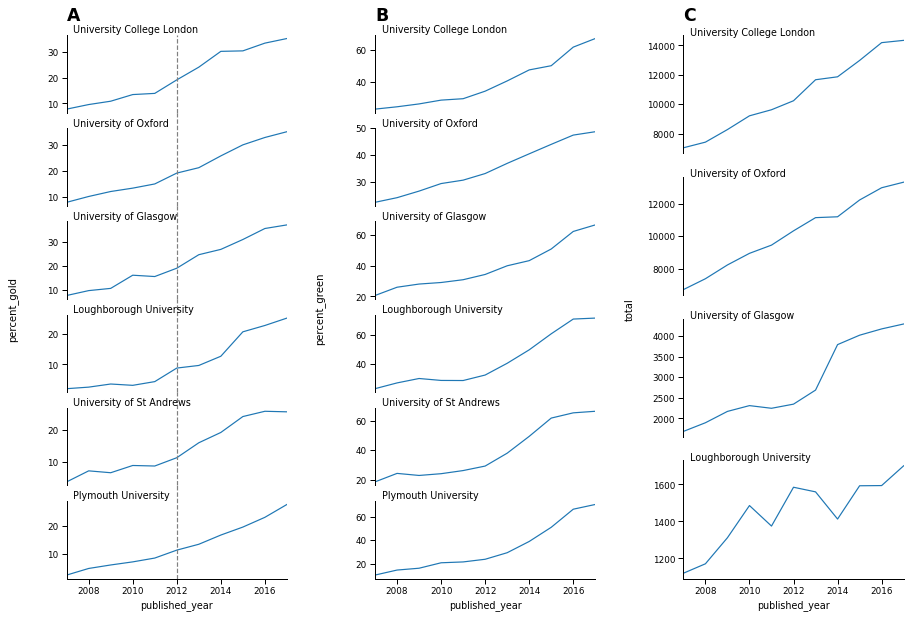

In [15]:
plots = [
            {
            'year_range': (2007,2018),
            'unis': [
                'grid.83440.3b', # University College London 
                'grid.4991.5', # University of Oxford 
                'grid.8756.c', # University of Glasgow
                'grid.6571.5', # Loughborough University
                'grid.11914.3c', # University of St Andrews
                'grid.11201.33', #Plymouth University
                    ],
            'y_column': 'percent_gold',
            'markerline' : 2012
            },
            {
            'year_range': (2007,2018),
            'unis': [
                'grid.83440.3b', # University College London 
                'grid.4991.5', # University of Oxford 
                'grid.8756.c', # University of Glasgow
                'grid.6571.5', # Loughborough University
                'grid.11914.3c', # University of St Andrews
                'grid.11201.33', #Plymouth University
                    ],
            'y_column': 'percent_green'
            },
            {
            'year_range': (2007,2018),
            'unis': [
                'grid.83440.3b', # University College London 
                'grid.4991.5', # University of Oxford 
                'grid.8756.c', # University of Glasgow
                'grid.6571.5' # Loughborough University
                #'grid.11914.3c', # University of St Andrews
                #'grid.11201.33', #Plymouth University
                    ],
            'y_column': 'total'
            }
]

tp = TimePlotLayout(test_data, plots)
tp.process_data()
tp.plot(figsize=(15,10), wspace=0.4, ylabel_adjustment=0.05, panel_labels=True, panellable_adjustment=0.02)

In [16]:
comparison = [
                'grid.83440.3b', # University College London 
                'grid.4991.5', # University of Oxford 
                'grid.8756.c', # University of Glasgow
                'grid.6571.5', # Loughborough University
                'grid.11914.3c', # University of St Andrews
                'grid.11201.33', #Plymouth University
                #'grid.11899.38' # University of Sao Paolo
                #'grid.410543.7', # Sao Paulo State University
                #'grid.9486.3' # National Autonomous University of Mexico
                'grid.411221.5' # Universidade Federal de Pelotas   
                    ]
t = TimePath(test_data, (2007,2018), 
             comparison, 
             'percent_green', 'percent_gold')

/Users/266883j/Documents/academic-observatory/academic_observatory/analysis/charts.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambda v: self.unis.index(v))


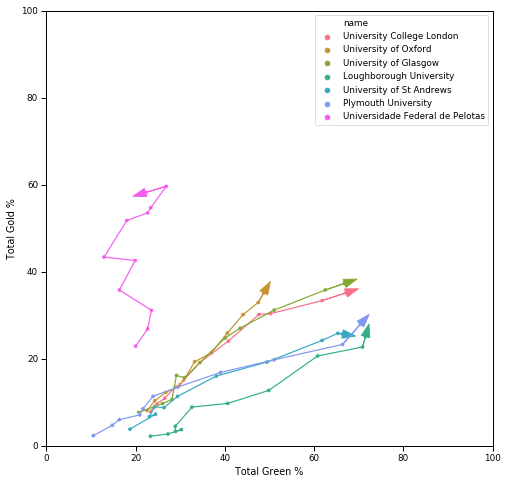

In [17]:
t.process_data()
p = t.plot(xlim=(0,100), ylim=(0,100), xlabel='Total Green %', ylabel = 'Total Gold %', figsize=(8,8))

In [18]:
t.animate(xlim=(0,100), ylim=(0,100),xlabel='Total Green %', ylabel = 'Total Gold %', figsize=(8,8))

In [19]:
m = CountryChloropleth(test_data, 'total', 'country', 'country')
m.world.set_index('name')
m.process_data()

TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.groupby.generic.DataFrameGroupBy'> was passed